## A quick analysis of my Spotify account 

In [23]:
from secrets import *
from spotify_user import *
import plotly.express as px
from datetime import datetime, timedelta
from dateutil.parser import parse
import calendar


In [2]:
pd.set_option('display.max_colwidth', 100)
s = SpotifyUser(OAUTH_TOKEN, CLIENT_ID, USER_ID)

### My last played tracks

In [3]:
s.last_played_tracks(limit=20)

,artist,song
0,Donald Byrd,I Feel Like Loving You Today
1,Gábor Szabó,Theme For Gabor
2,Soft Machine,Hazard Profile Part 1
3,John Klemmer,Glass Dolphins
4,Henry Mancini,Moon River - Remastered
5,Lewis Parker,A Thousand Fragments
6,Lewis Parker,A Thousand Fragments
7,Cunninlynguists,Clap
8,J. Depina,Night Walk
9,Cunninlynguists,Cornasto


### My playlists

In [4]:
playlists = s.get_playlists()

In [5]:
playlists

,name,tracks_link,total_tracks
0,esoteric_jazz,https://api.spotify.com/v1/playlists/3Y3wdueMec0I1Arzxy2u7q/tracks,142
1,Doom,https://api.spotify.com/v1/playlists/4Cd3tuySmVNveCQyPEOTuc/tracks,55
2,metal/alternative,https://api.spotify.com/v1/playlists/3B6Mo7x1fAbhESw5NTgkMs/tracks,10
3,journey through 92-98,https://api.spotify.com/v1/playlists/2MjYdZrL3oWza1T8J0NQtD/tracks,133
4,other non hiphop,https://api.spotify.com/v1/playlists/5Fj6lBYcw8SO9QceJokuNK/tracks,98
5,wedding,https://api.spotify.com/v1/playlists/3VpMi1RrxiH5evTH4B344e/tracks,33
6,desi beats,https://api.spotify.com/v1/playlists/5vFl81ORmPSibHM5u1rnIq/tracks,29
7,metal etc,https://api.spotify.com/v1/playlists/0akZ9mU7oCF9HMSexa4INY/tracks,66
8,hardcore hiphop,https://api.spotify.com/v1/playlists/7vOqIAWAKTJaSIsytMI5Ih/tracks,2773


### Get all the tracks in 'hardcore hiphop'

In [6]:
hiphop_tracks = s.get_playlist_tracks('hardcore hiphop', get_all=True)

In [7]:
hiphop_tracks.shape

(2773, 5)

In [8]:
hiphop_tracks.head()

,artists,tracks,release_date,duration,date_added
0,"Capone-N-Noreaga, Mobb Deep, Tragedy Khadafi","L.A., L.A. - Kuwait Mix",1997-06-17,289666,2018-06-26T10:50:39Z
1,"Mack 10, Tha Dogg Pound",Nothin' But The Cavi Hit,2007-01-01,241360,2018-06-26T10:50:56Z
2,Showbiz & A.G.,Next Level - Nyte Time Mix,2017-09-01,250780,2018-06-26T10:53:34Z
3,"Showbiz & A.G., Big Pun, KRS-One",Drop It Heavy,1998-05-24,250066,2018-06-26T10:54:03Z
4,Showbiz & A.G.,Hold Mines,1998-05-24,234253,2018-06-26T10:54:57Z


In [9]:
def process_playlist_tracks(playlist_df):
    
    def hour_rounder(t):
        return (t.replace(second=0, microsecond=0, minute=0, hour=t.hour)
                   +timedelta(hours=t.minute//30))    
    playlist_df['release_year'] = playlist_df['release_date'].apply(lambda x: int(x[:4]))
    playlist_df['date_added_dt'] = playlist_df['date_added'].apply(lambda x: datetime.fromisoformat(x[:-1]))
    playlist_df['day_added'] = playlist_df['date_added_dt'].apply(lambda x: calendar.day_name[x.weekday()])
    playlist_df['date_added_yyyymmdd'] = playlist_df['date_added_dt'].apply(lambda x: x.strftime('%Y-%m-%d'))
    playlist_df['rounded_hour_added'] = playlist_df['date_added_dt'].apply(lambda x: hour_rounder(x).strftime('%H:%M:%S'))
    playlist_df['total_artists'] = playlist_df['artists'].apply(lambda x: len(x.split(',')))
    
    return playlist_df


In [10]:
hiphop_df = process_playlist_tracks(hiphop_tracks)

In [11]:
hiphop_df.head()

,artists,tracks,release_date,duration,date_added,release_year,date_added_dt,day_added,date_added_yyyymmdd,rounded_hour_added,total_artists
0,"Capone-N-Noreaga, Mobb Deep, Tragedy Khadafi","L.A., L.A. - Kuwait Mix",1997-06-17,289666,2018-06-26T10:50:39Z,1997,2018-06-26 10:50:39,Tuesday,2018-06-26,11:00:00,3
1,"Mack 10, Tha Dogg Pound",Nothin' But The Cavi Hit,2007-01-01,241360,2018-06-26T10:50:56Z,2007,2018-06-26 10:50:56,Tuesday,2018-06-26,11:00:00,2
2,Showbiz & A.G.,Next Level - Nyte Time Mix,2017-09-01,250780,2018-06-26T10:53:34Z,2017,2018-06-26 10:53:34,Tuesday,2018-06-26,11:00:00,1
3,"Showbiz & A.G., Big Pun, KRS-One",Drop It Heavy,1998-05-24,250066,2018-06-26T10:54:03Z,1998,2018-06-26 10:54:03,Tuesday,2018-06-26,11:00:00,3
4,Showbiz & A.G.,Hold Mines,1998-05-24,234253,2018-06-26T10:54:57Z,1998,2018-06-26 10:54:57,Tuesday,2018-06-26,11:00:00,1


#### A median release year of 2002 makes me an 'old head' but this is actually biased upward. The release date isn't very accurate, e.g. the Showbiz & AG album above came out in 1995. This release date may relate to a specific type of release/ reissue.

In [12]:
np.median(hiphop_df['release_year'])

2002.0

#### Create some useful groups to chart up

In [13]:
def simple_grouper(df, by):
    return (df.groupby(by).count()).reset_index()

In [14]:
release_year_group = simple_grouper(hiphop_df, 'release_year')

In [15]:
artist_group = simple_grouper(hiphop_df, 'artists')

In [16]:
date_group = simple_grouper(hiphop_df, 'date_added_yyyymmdd')

In [17]:
added_hour_group = simple_grouper(hiphop_df, 'rounded_hour_added')

In [18]:
day_group = simple_grouper(hiphop_df, 'day_added')

In [19]:
total_artists_group = simple_grouper(hiphop_df, 'total_artists')

#### Modal release year is 1996. The distribution has a curious bimodal look to it.

#### Nas is clearly my favourite artist. Jay Z is surprisingly high given I don't like him that much. Also surprised to see Eminem in the top 20.

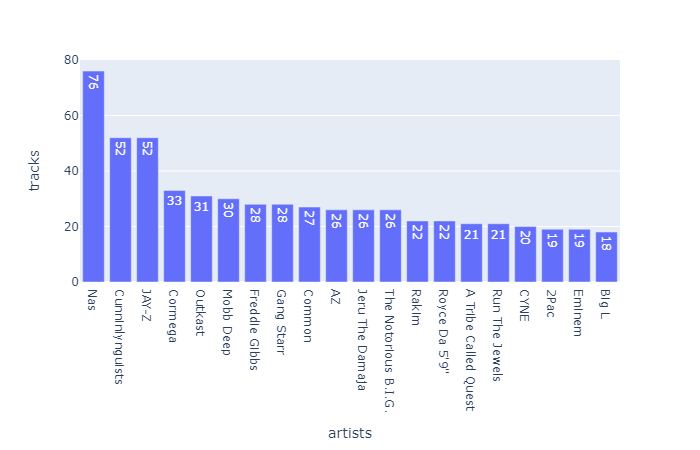

In [24]:
fig = px.bar(artist_group.nlargest(20, 'tracks'), x = 'artists', y = 'tracks', text = 'tracks')
fig.show('png')

#### 2020 was a comparatively quiet year for uploads for me.

In [25]:
fig = px.bar(date_group,x = 'date_added_yyyymmdd', y = 'tracks')
fig.show()

#### Some interesting times here, I'm clearly more likely to add a track to this playlist at around 4pm.

In [27]:
fig = px.bar(added_hour_group,x = 'rounded_hour_added', y = 'tracks', text = 'tracks')
fig.show()

#### Thursday, Friday and Saturday for the win, Monday is clearly a bad day.

In [28]:
fig = px.bar(day_group,x = 'day_added', y = 'tracks', text = 'tracks')
fig.update_layout( xaxis={'categoryorder':'total descending'})
fig.show()

#### Majority of the tracks are solo but partial to a collaboration or two.

In [29]:
fig = px.bar(total_artists_group,x = 'total_artists', y = 'tracks', text = 'tracks')
fig.show()